[Notebook for Medium Article on Yahoo Finance](https://medium.com/nerd-for-tech/all-you-need-to-know-about-yfinance-yahoo-finance-library-fa4c6e48f08e)

### Import Libraries

In [1]:
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd

### Basic information

In [2]:
tsla = yf.Ticker("TSLA")
tsla.info

{'zip': '94304',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 70757,
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products through its subsidiaries to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and 

In [3]:
print(f"Market Cap : {tsla.info['marketCap']}\n")
print(f"Employees : {tsla.info['fullTimeEmployees']}\n")
print(f"Business Summary : \n{tsla.info['longBusinessSummary']}")

Market Cap : 689587945472

Employees : 70757

Business Summary : 
Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products through its subsidiaries to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warranties and extend

In [4]:
tsla.history(period='5d')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-02-23,662.130005,713.609985,619.000000,698.840027,66606900,0,0
2021-02-24,711.849976,745.000000,694.169983,742.020020,36767000,0,0
2021-02-25,726.150024,737.210022,670.580017,682.219971,39023900,0,0
2021-02-26,700.000000,706.700012,659.510010,675.500000,41011300,0,0
2021-03-01,690.109985,872.000000,685.049988,718.429993,27009700,0,0


In [5]:
#Remove actions
tsla.history(period='5d', actions=False)

,Open,High,Low,Close,Volume
Date,,,,,
2021-02-23,662.130005,713.609985,619.000000,698.840027,66606900
2021-02-24,711.849976,745.000000,694.169983,742.020020,36767000
2021-02-25,726.150024,737.210022,670.580017,682.219971,39023900
2021-02-26,700.000000,706.700012,659.510010,675.500000,41011300
2021-03-01,690.109985,872.000000,685.049988,718.429993,27009700


In [17]:
#Getting data using start date and end date
tsla=yf.Ticker('tsla')
tsla.history(start="2021-02-20", end="2021-03-01", actions=False)

,Open,High,Low,Close,Volume
Date,,,,,
2021-02-22,762.640015,768.500000,710.200012,714.500000,37269700
2021-02-23,662.130005,713.609985,619.000000,698.840027,66606900
2021-02-24,711.849976,745.000000,694.169983,742.020020,36767000
2021-02-25,726.150024,737.210022,670.580017,682.219971,39023900
2021-02-26,700.000000,706.700012,659.510010,675.500000,41011300


### Intraday plot

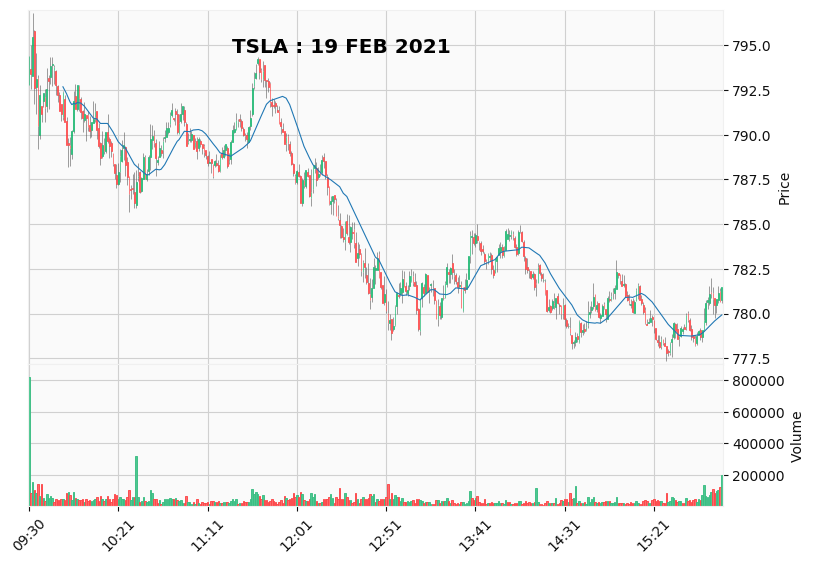

In [22]:
hist=tsla.history(start='2021-02-19', end='2021-02-20', 
                  interval='1m', actions=False)



mpf.plot(hist, type='candle', volume=True, style='yahoo', mav=(20),
        title='TSLA : 19 FEB 2021', tight_layout=True)


### Fetching multiple tickers

In [23]:
data = yf.download("AMZN AAPL TSLA", period="ytd",
        group_by='ticker', actions=False)
amzn=data["AMZN"]
aapl=data["AAPL"]

[*********************100%***********************]  3 of 3 completed


In [24]:
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,3270.00000,3272.000000,3144.020020,3186.629883,3186.629883,4411400
2021-01-05,3166.01001,3223.379883,3165.060059,3218.510010,3218.510010,2655500
2021-01-06,3146.47998,3197.510010,3131.159912,3138.379883,3138.379883,4394800
2021-01-07,3157.00000,3208.540039,3155.000000,3162.159912,3162.159912,3514500
2021-01-08,3180.00000,3190.639893,3142.199951,3182.699951,3182.699951,3537700


### Covnvert data into csv

In [25]:
amzn.to_csv('amzn.csv')

## Other functions in Ticker Module

In [26]:
#actions
aapl=yf.Ticker('AAPL')
aapl.actions.tail(5)

,Dividends,Stock Splits
Date,,
2020-05-08,0.205,0.0
2020-08-07,0.205,0.0
2020-08-31,0.000,4.0
2020-11-06,0.205,0.0
2021-02-05,0.205,0.0


In [27]:
#dividends
aapl.dividends.tail()

Date
2020-02-07    0.1925
2020-05-08    0.2050
2020-08-07    0.2050
2020-11-06    0.2050
2021-02-05    0.2050
Name: Dividends, dtype: float64

In [28]:
#splits
aapl.splits.tail()

Date
1987-06-16    2.0
2000-06-21    2.0
2005-02-28    2.0
2014-06-09    7.0
2020-08-31    4.0
Name: Stock Splits, dtype: float64

In [29]:
#major_holders
aapl.major_holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,59.66%,% of Shares Held by Institutions
2,59.70%,% of Float Held by Institutions
3,4453,Number of Institutions Holding Shares


In [30]:
#institutional_holders
aapl.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",1255155794,2020-12-30,0.0748,166546622305
1,Blackrock Inc.,1056461286,2020-12-30,0.0629,140181848039
2,"Berkshire Hathaway, Inc",887135554,2020-12-30,0.0528,117714016660
3,State Street Corporation,638166552,2020-12-30,0.0380,84678319784
4,"FMR, LLC",358551697,2020-12-30,0.0214,47576224674
5,"Geode Capital Management, LLC",247977084,2020-12-30,0.0148,32904079275
6,Price (T.Rowe) Associates Inc,210474648,2020-12-30,0.0125,27927881043
7,Northern Trust Corporation,205000080,2020-12-30,0.0122,27201460615
8,Bank Of New York Mellon Corporation,157791038,2020-12-30,0.0094,20937292832
9,Bank of America Corporation,136551580,2020-12-30,0.0081,18119029150


In [31]:
#sustainability
aapl.sustainability

,Value
2021-2,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,7.55
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [32]:
#Analyst recommendations
aapl.recommendations.tail()

,Firm,To Grade,From Grade,Action
Date,,,,
2021-01-28 18:26:52,Bernstein,Market Perform,,main
2021-01-28 18:59:50,Piper Sandler,Overweight,,main
2021-01-28 19:03:20,Wells Fargo,Overweight,,main
2021-01-28 19:08:11,Deutsche Bank,Buy,,main
2021-01-28 19:09:14,DA Davidson,Buy,,main


In [33]:
# Show the upcoming events
aapl.calendar

,0,1
Earnings Date,2021-04-28 00:00:00,2021-05-03 00:00:00
Earnings Average,0.98,0.98
Earnings Low,0.85,0.85
Earnings High,1.09,1.09
Revenue Average,76920700000,76920700000
Revenue Low,70790900000,70790900000
Revenue High,83193000000,83193000000


In [34]:
# Show ISIN code
aapl.isin

'US0378331005'

In [35]:
# Available option expiration dates
aapl.options

('2021-03-05',
 '2021-03-12',
 '2021-03-19',
 '2021-03-26',
 '2021-04-01',
 '2021-04-09',
 '2021-04-16',
 '2021-05-21',
 '2021-06-18',
 '2021-07-16',
 '2021-09-17',
 '2021-10-15',
 '2022-01-21',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17')

In [36]:
aapl.option_chain('2021-03-19').puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL210319P00030000,2021-02-26 14:42:09,30.0,0.01,0.00,0.00,0.000000,0.000000,10.0,435,0.500005,False,REGULAR,USD
1,AAPL210319P00035000,2021-02-04 18:14:49,35.0,0.01,0.00,0.00,0.000000,0.000000,24.0,25,0.500005,False,REGULAR,USD
2,AAPL210319P00040000,2021-02-22 14:34:09,40.0,0.01,0.00,0.00,0.000000,0.000000,NaN,20,0.500005,False,REGULAR,USD
3,AAPL210319P00045000,2021-02-26 14:37:08,45.0,0.01,0.00,0.00,0.000000,0.000000,5.0,41,0.500005,False,REGULAR,USD
4,AAPL210319P00047500,2021-02-25 20:41:50,47.5,0.01,0.00,0.00,0.000000,0.000000,2.0,2512,0.500005,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,AAPL210319P00580000,2020-08-27 15:20:54,580.0,111.75,114.45,115.70,0.000000,0.000000,30.0,61,0.000010,True,REGULAR,USD
152,AAPL210319P00600000,2020-08-26 17:08:48,600.0,128.00,129.75,131.20,2.470001,1.967658,2.0,18,0.000010,True,REGULAR,USD
153,AAPL210319P00660000,2020-08-10 19:47:01,660.0,218.20,179.50,181.25,0.000000,0.000000,30.0,30,0.000010,True,REGULAR,USD
154,AAPL210319P00720000,2020-08-24 18:34:05,720.0,231.00,233.25,235.30,0.000000,0.000000,NaN,30,0.000010,True,REGULAR,USD
